# 1. Read the dataset to the python environment

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
data=pd.read_csv('Wine.csv')
data=pd.DataFrame(data)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#find shape of dataset
data.shape

(178, 13)

In [4]:
#check the missing values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
# scaling the data
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)

# 2. Try out different clustering models in the wine dataset.


### K-means Clustering

2314.0
1659.0079672511501
1277.9284888446423
1175.705192819712
1104.8616839625317
1042.3872037251417
988.0533283180057
940.708165089653
902.0783170433883
866.7991687164845


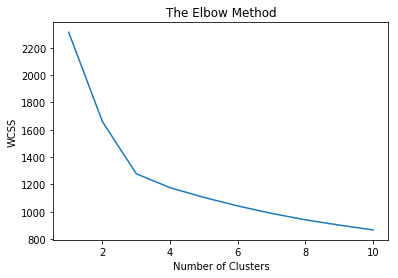

In [6]:
#Find the optimum number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
    
plt.plot(range(1, 11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)
#type(data)
#y_kmeans=pd.DataFrame(y_kmeans)

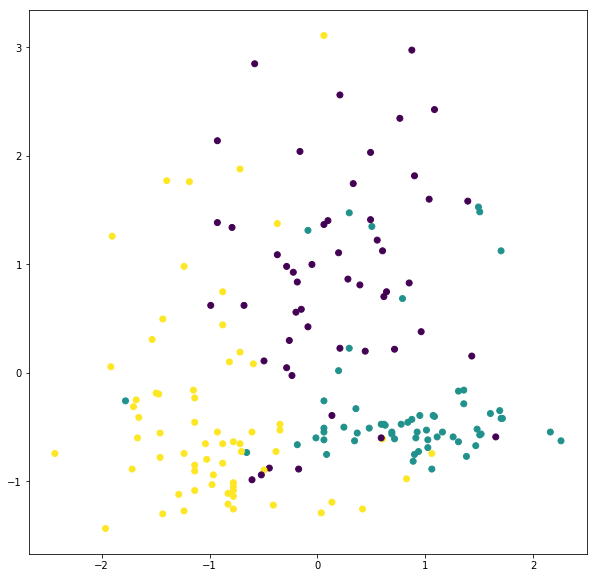

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(data[:,0],data[:,1],c=y_kmeans)
plt.show()

In [9]:
sample=[[5.7,4.2,1.2,0.2,2.4,5,2.2,5.6,8.2,0.2,0.8,1.2,6.4]]
new_labels=kmeans.predict(sample)
print(new_labels)

[1]


### Hierarchical clustering

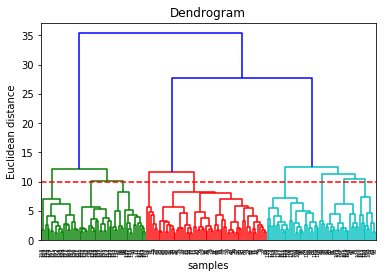

In [10]:
#dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.hlines(10,0,5000,colors='r',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distance')
plt.show()

The optimum number of clusters=5

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 3, 0,
       0, 1, 2, 1, 2, 0, 3, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4,
       4, 4], dtype=int64)

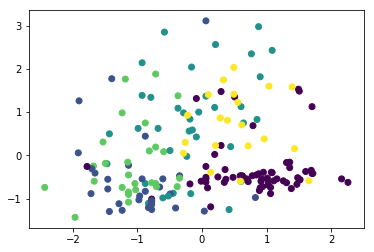

In [12]:
plt.scatter(data[:,0],data[:,1],c=y_hc)

### PCA

In [13]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data)
x_pca = pca.transform(data)
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

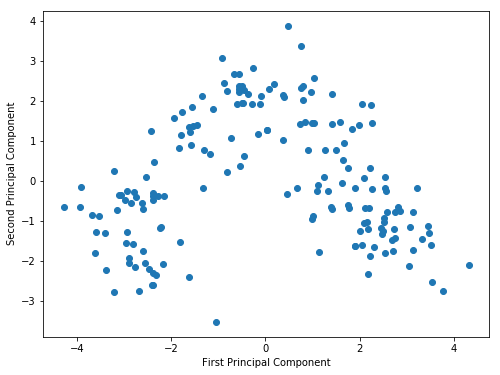

In [14]:
# plotting the PCA components
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1] ,cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [15]:
# displaying the PCA components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])